# CS 1010
# Week 6 - Cordless Screwdriver Data Analysis
    
### Instructor: 
**Prof. Kartik Bulusu [CS & MAE]**

#### Teaching Assistants: 
**Marshall Thompspon [CS], Jonathan Garcia [MAE], Matthew Dionne [CS]**

#### Learning Assistants: 
**Josie Libbon [CS], Josh Rizika [CS Dept], Miles Grant [CS], Addy Irankunda [Physics], Talia Novack [CS] Fred Kamgang [CS]**

If you have any questions regarding Python, please feel free to send a slack message or email to a member of the teaching team or come to office hours! We are happy to help!!

Let's start by importing our favorite friends as always going forward in this class: **numpy**, **matplotlib**, and **pandas**

In [1]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd

## Data from a Google Form to Python!
We are going to work with data from a google form today!

Here is the [link to the form](https://docs.google.com/forms/d/e/1FAIpQLSeUCEX8HM6WoIWI9fZqrz0wafTbaBM77GI9fxpKC3sRB3auVg/viewform?usp=sf_link) to fill out your data if you haven't yet!


Here is the [link to the spreadsheet](https://docs.google.com/spreadsheets/d/1Lw9AFCTaDaucbENfnL8iBvrLjs7ULtZPxp2gx9wiKv8/edit?usp=sharing) that collects everyone's data!

First we are going to establish a walk through the parts that will be used in our big function

### Introduction to Python functions

A function is a block of code that does something. It takes in arguments and gives back returns. Think of arguments as the ingredients, the function and the cooking, and the returns as the food you made. 

To establish a function in python, use `def function_name(arg1, arg2, ...., argN):`

To return an output from your function use `return()`

In [2]:
def my_function(x):
    return(x+7)

This is where we call the function. Just as we did with any other function in Python using the `()`

In [3]:
y = my_function(8)
print(y)

15


We can also use multiple arguments to a function. Here is an example of that

In [4]:
def my_func2(s, t):
    q = s + 7*t
    return(q)

In [5]:
print(my_func2(10, 41))

297


### Other useful tools we will use in our processing

#### Introduction to the `STRING.index(SUBSTRING)` method

We can pull the index, or location, of a substring in a string using the `.index` method. Let's explore that!

In [6]:
my_string = 'Happy Birthday to You!'

section = 'irthd'

x = my_string.index(section)
print(x)

#show the section following the index
print(my_string[x:])

7
irthday to You!


#### Introduction to the `STRING.format()` method

We can put information into a string in certain places using the `.format()` method. This makes a lot more sense in practice, so let's try it out

In [7]:
my_string2 = 'I am a string with curly braces here: {} and I keep going!'

print(my_string2.format(2))

#It updates the curly braces to contain the value specified. This can also be a string!
print(my_string2.format('Hello!'))

#And it can be a variable!
x = 10 + 8
print(my_string2.format(x))

I am a string with curly braces here: 2 and I keep going!
I am a string with curly braces here: Hello! and I keep going!
I am a string with curly braces here: 18 and I keep going!


In [8]:
#and it works with multiple variables!
my_string3 = 'I now have {} sets of braces in my string {}'
print(my_string3.format(2, 9))

I now have 2 sets of braces in my string 9


### The Google Sheet Processing Function

Now we will define our function for the google sheet reading

We will take in the URL of the google sheet, convert the stored file to the csv file, and then use the `pd.read_csv(FILE)` we have seen in the previous classes

In [9]:
def google_sheets_dataframe(URL, file_name):
    '''
    This is called the docstring, it explains what the function does
    Using the help(function_name) pulls up the docstring for the function! Try it out

    This function pulls data from a google spreadsheet into a pandas dataframe by first converting it to a csv file

    Arguments: 
    URL = string form of the url to the google spreadsheet
    file_name = name of the file on the drive

    Returns: Pandas Dataframe of the contents from the sheet
    '''

    #first we slice the information from the URL that indicates the unique form we are working with
    #this information is stored in the URL between the .../d/ and the /edit... 
    
    #in order to pull this region, we use the STRING.index(SUBSTRING) to return the index associated with the substring
    id1 = URL.index('/d/') + 3
    #the +3 here accomodates for the length of this substring '/d/'
    id2 = URL.index('/edit')

    gsheet_id = URL[id1:id2]

    #now we will use the STRING.format(variables) to update a special string with our gsheet_id and sheet_name
    gsheet_string = 'https://docs.google.com/spreadsheets/d/{}/gviz/tq?tqx=out:csv&sheet={}'
    #this special string converts the data in the sheet to a csv file for us when given the appropriate parameters
    gsheet_csv = gsheet_string.format(gsheet_id, file_name)

    #and now like normal we will use the pd.read_csv(FILE) to convert a csv file to a pandas dataframe
    df = pd.read_csv(gsheet_csv)

    return(df)


This URL is coming from the spreadsheet linked above and also here:
'https://docs.google.com/spreadsheets/d/1Lw9AFCTaDaucbENfnL8iBvrLjs7ULtZPxp2gx9wiKv8/edit#gid=1114288647'

The name of the file when opened is 'Week6_ScrewdriverData' so we paste that in too

In [10]:
url = 'https://docs.google.com/spreadsheets/d/1Lw9AFCTaDaucbENfnL8iBvrLjs7ULtZPxp2gx9wiKv8/edit#gid=1114288647'
name = 'Week6_ScrewdriverData'
my_data = google_sheets_dataframe(url, name)

display(my_data)

,Timestamp,Group Number,Measured Revoultions per Minute (RPM)
0,11/4/2021 16:19:36,0,47
1,11/4/2021 16:20:06,0,28
2,11/4/2021 16:20:06,0,28
3,11/5/2021 10:48:00,0,78
4,11/5/2021 11:12:31,7,288
5,11/5/2021 11:34:13,9,288
6,11/5/2021 11:36:00,4,300
7,11/5/2021 13:38:06,22,288
8,11/5/2021 13:38:12,32,288


### Clean up our data!

1. Update our column names

2. Remove duplicates

3. Reorder our data by group number from lowest to highest

4. Convert our data into numpy arrays!

#### Step 1. Change the column names to something we can work with easily

To do this, we can bring back a friend from week 3 to update the columns of a pandas frame

`DF.columns = COLUMN_NAMES_LIST`

In [11]:
my_data.columns = ['Timestamp', 'Group Num', 'RPM']

#### Step 2. Drop duplicated group entries

We want to make sure that if a group filled out the form more than once, they only appear once. In order to do this, we will keep the last instance of data recorded for them. 

Now we will use `df.drop_duplicates(subset=[COLUMN_NAME], keep='last')` for our processing. This has a lot of parts so let's break it down


First `df.drop_duplicates(subset=[])` will remove identical parts of a section of a frame for that subset. In this case we will give it the column 'Group Num' to be our check. 

We want to keep the last instance that appears. This is the `keep='last'` argument



In [12]:
my_clean_data = my_data.drop_duplicates(subset=['Group Num'], keep='last')
display(my_clean_data)

,Timestamp,Group Num,RPM
3,11/5/2021 10:48:00,0,78
4,11/5/2021 11:12:31,7,288
5,11/5/2021 11:34:13,9,288
6,11/5/2021 11:36:00,4,300
7,11/5/2021 13:38:06,22,288
8,11/5/2021 13:38:12,32,288


#### Step 3. Reorder our data into group order (ascending)

Step 3a. First we will use the `DF.sort_values(by=[COLUMN_NAME])` to rearrange our data into ascending order for the group number

Step 3b. Then we will update the index values to be a nice list from 0 to N-1 rows as pandas would default to

To do this we will bring back our friend from week 3:

`DF.index = list(range(len(DF.index)))`

In [13]:
#3a. Sort the values
my_clean_data = my_clean_data.sort_values(by=['Group Num'])
display(my_clean_data)

,Timestamp,Group Num,RPM
3,11/5/2021 10:48:00,0,78
6,11/5/2021 11:36:00,4,300
4,11/5/2021 11:12:31,7,288
5,11/5/2021 11:34:13,9,288
7,11/5/2021 13:38:06,22,288
8,11/5/2021 13:38:12,32,288


In [14]:
#3b. Update the index
my_clean_data.index = list(range(len(my_clean_data.index)))
display(my_clean_data)

,Timestamp,Group Num,RPM
0,11/5/2021 10:48:00,0,78
1,11/5/2021 11:36:00,4,300
2,11/5/2021 11:12:31,7,288
3,11/5/2021 11:34:13,9,288
4,11/5/2021 13:38:06,22,288
5,11/5/2021 13:38:12,32,288


#### Step 4. Pull out the numpy arrays for Group Number and RPM

To do this we will use our slicing and `DF.loc[].values` function seen in week 3

In [15]:
groups = my_clean_data.loc[:, 'Group Num'].values
rpm = my_clean_data.loc[:, 'RPM'].values

print(groups)
print()
print(rpm)

[ 0  4  7  9 22 32]

[ 78 300 288 288 288 288]


## Stats with our data!

To show of the stats we are going to do a couple activities. First we are going to calculate some data using numpy. Then we are going to plot with matplotlib

### Numpy stats

We are going to showcase some of the features with numpy for doing statistical analysis.

We will cover the following in class:
1. Mean
2. Median
3. Max and Min values
4. Sample Standard Deviation

In [16]:
average = np.mean(rpm)
print('The average value of the array is: {}'.format(average))

med = np.median(rpm)
print('The median value of the array is: {}'.format(med))

max_value = np.amax(rpm)
print('The max value of the array is: {}'.format(max_value))

min_value = np.amin(rpm)
print('The min value of the array is: {}'.format(min_value))

#we will use sample stdev all of the time, but population stdev is below!
sample_stdev = np.std(rpm, ddof=1)
print('The sample standard deviation is {}'.format(sample_stdev))

The average value of the array is: 255.0
The median value of the array is: 288.0
The max value of the array is: 300
The min value of the array is: 78
The sample standard deviation is 86.84468895678077


Here are some bonus stats you can work with!

In [17]:
max_index = np.argmax(rpm)
print('The index of the max value of the array is: {}'.format(max_index))

min_index = np.argmin(rpm)
print('The index of the min value of the array is: {}'.format(min_index))

data_range = max_value - min_value
print('The range of the array is: {}'.format(data_range))

pop_stdev = np.std(rpm, ddof=0)
print('The population standard deviation is {}'.format(pop_stdev))

sample_var = np.var(rpm, ddof=1)
pop_var = np.var(rpm, ddof=0)
print('The sample variance is {}'.format(sample_var))
print('The population variance is {}'.format(pop_var))

The index of the max value of the array is: 1
The index of the min value of the array is: 0
The range of the array is: 222
The population standard deviation is 79.27799190191436
The sample variance is 7542.0
The population variance is 6285.0


### Histogram of our data!

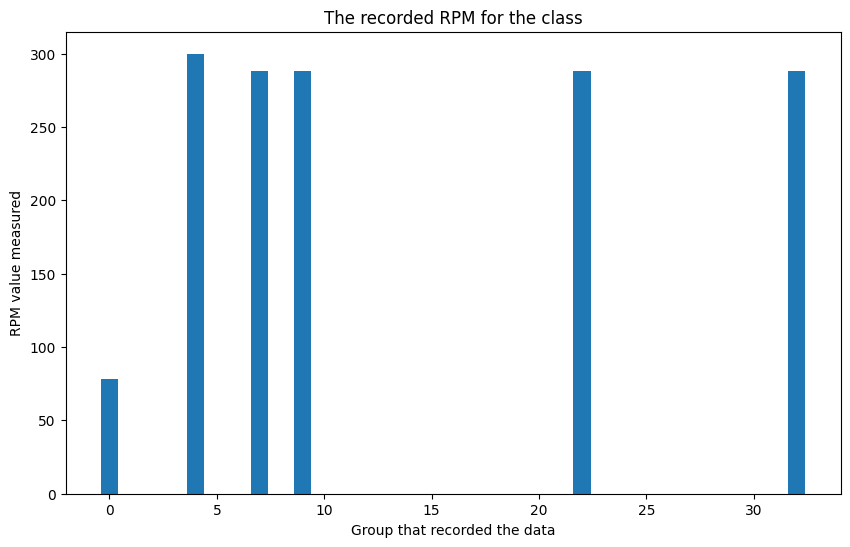

In [18]:
fig, ax = plt.subplots(figsize=(10,6))

ax.bar(groups, rpm)
ax.set_title('The recorded RPM for the class')
ax.set_xlabel('Group that recorded the data')
ax.set_ylabel('RPM value measured');

Wouldn't it be cool to show the average on this plot too! Let's make a red line horizontally at the average to show how the RPM varies around it

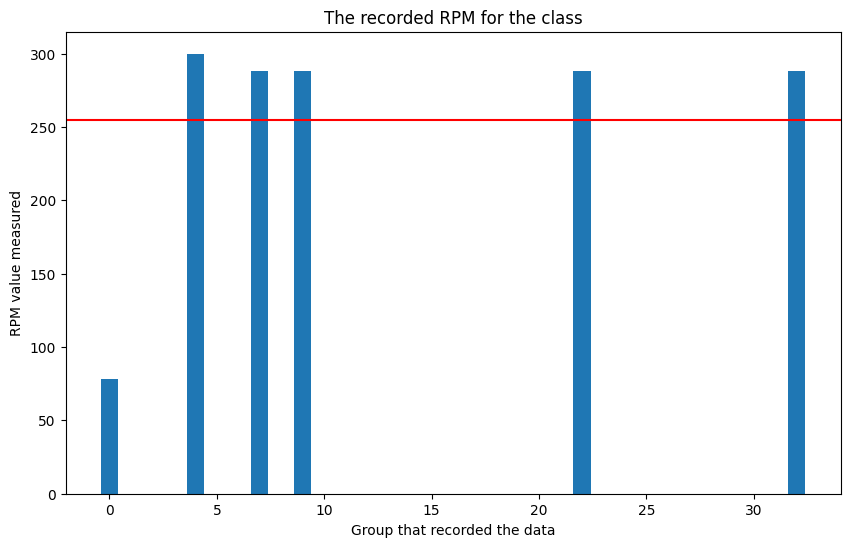

In [19]:
fig, ax = plt.subplots(figsize=(10,6))

ax.axhline(y=np.mean(rpm), color='red')

ax.bar(groups, rpm)
ax.set_title('The recorded RPM for the class')
ax.set_xlabel('Group that recorded the data')
ax.set_ylabel('RPM value measured');

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=7dc91a80-ae46-4ae1-897f-4f90a46b055c' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>